# STEP 1: describing the data

# Description about the project : This machine learning based program predicts if a passenger on the titanic will survive or not .
# About the data : Data downloded from kaggle website . link :https://www.kaggle.com/c/titanic/ . It has 3 csv file (train, test,gender_submission)
# In this competition, we are gaining access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.Train.csv contains the details of a subset of the passengers on board (891 to be exact) and importantly,reveals whether they survived or not, also known as the “ground truth”.The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s our job to predict these outcomes.Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived. We have to Check out the “Data” tab to explore the datasets even further. 
# The titanic data is used here to predict passanger who will survive . the dataset contains 13 colum where survived is label data and others are feature . based on those feature we will predict which type of passenger will survive
# We could Identify this as a classification problem

In [160]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [161]:
#load the data
training = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [162]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

In [163]:
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## STEP 2: Initial Exploration of the data (print data, visualize data). Find number of
## attributes, number of records in the data. Also find if there is any attribute
## which has missing data.

# The sinking of the Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [164]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [165]:
training.shape

(891, 13)

 # **So this dataset contains 891 passengers and their information and 13 columns of features**

In [166]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


# **Here age column missing few values as it is 714 rather than 891. from this we can observe age feature missed 177 values. the maximum age is 80 , and minimum 0.42 which means child . using the describe function it shows the statistical information of the data . From where we can observe that the higest fare and lowest fare ans do on.**

# STEP 3: Find correlation of data attributes and target variable (whether survived or
# not) to explore which attributes have most effects on output (target
# variable).

In [167]:
training.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
PassengerId,1.000000,-0.005007,0.022371,1.000000,-0.042939,0.087952,-0.018775,0.001294,0.750422,0.244103,0.077313,-0.025688,NaN
Survived,-0.005007,1.000000,0.277523,-0.005007,0.543351,0.048930,-0.173898,0.138338,-0.039201,0.180932,0.316508,0.130585,NaN
Pclass,0.022371,0.277523,1.000000,0.022371,0.126841,0.217013,-0.183808,0.033375,0.029155,0.122640,0.344055,-0.110803,NaN
Name,1.000000,-0.005007,0.022371,1.000000,-0.042939,0.087952,-0.018775,0.001294,0.750422,0.244103,0.077313,-0.025688,NaN
Sex,-0.042939,0.543351,0.126841,-0.042939,1.000000,0.016926,-0.118704,0.254439,-0.128758,0.144341,0.130542,0.114918,NaN
Age,0.087952,0.048930,0.217013,0.087952,0.016926,1.000000,-0.026893,0.139845,0.042324,0.078487,0.175400,-0.165496,NaN
SibSp,-0.018775,-0.173898,-0.183808,-0.018775,-0.118704,-0.026893,1.000000,-0.006966,-0.018571,-0.115377,-0.143267,-0.046180,NaN
Parch,0.001294,0.138338,0.033375,0.001294,0.254439,0.139845,-0.006966,1.000000,-0.264802,0.163157,0.070443,-0.052951,NaN
Ticket,0.750422,-0.039201,0.029155,0.750422,-0.128758,0.042324,-0.018571,-0.264802,1.000000,0.227846,0.060498,-0.020282,NaN
Fare,0.244103,0.180932,0.122640,0.244103,0.144341,0.078487,-0.115377,0.163157,0.227846,1.000000,0.303480,0.146699,NaN


# The correlations matrix of spearman shows us how the features of the dataset is correlated to eachother. We are now able to find out exact features from here where it creates huge difference in the predicted value. 

In [168]:
#get a count of the no of survivors 
training['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 0 means not survive and 1 means survived . so total 342 passengers survived , using counts function, it counts the parameter that is given . as the survived parameter has two value.

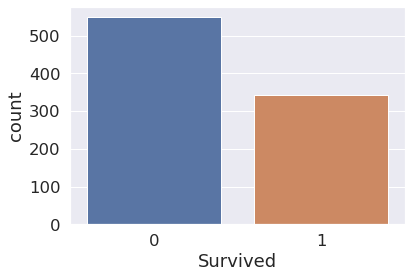

In [169]:
#visualize the count of survivors 
sns.countplot(training['Survived'])

# Rate is high when it comes to not surviving the accident, which is above 500 and survival count below 400 .

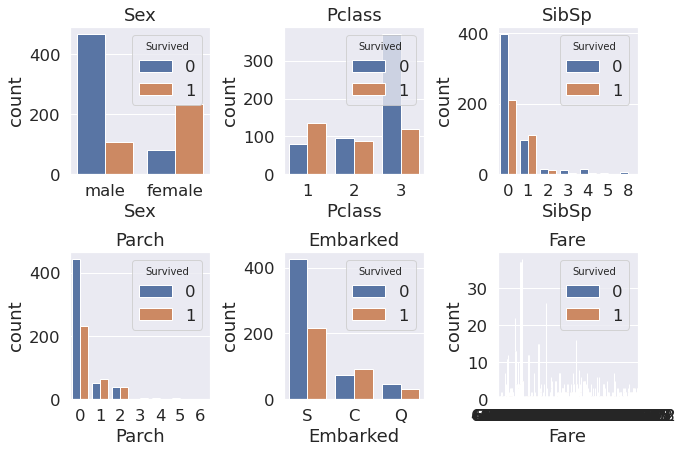

In [170]:
# Visualization of the count of  survivors for columns
cols=('Sex','Pclass','SibSp','Parch','Embarked','Fare')
n_rows=2
n_cols=3
#the subplot grid and figure size of each plot
fig, axs =plt.subplots(n_rows, n_cols , figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0,n_cols):
    i=r*n_cols + c  
    ax = axs[r][c] 
    sns.countplot(training[cols[i]],hue=training['Survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Survived',loc='upper right')
    plt.tight_layout()

# Subplots creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created.  Here we have build 6 subplots in 2 row . Which shows the survival visualization according to the name of the subplots . From first subplot we can assume that female  have most survival possibility compared to male.then from second subplot we can see that third pclass not survival rate is high where as first class survival rate is high. assumption of third subplot is having no spouse or sibling results highly not surviving result , on the other hand having at least one sibsp have high survival rate.from embarked plot people from s part have high not surviving rate, and from fare subplot ,people with less fare have high niot surviving rate , and high fare have has high surviving rate . i have chosen the function to show subplots in two row and 3 column  as there is 6 subplots .

In [171]:
training.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


# So, 74 percent women survived which is very high , and 18 percent men survived, using groupby function,it shows the survival rate group by sex .from where we can assume that the female has high survival rate .

In [172]:
training.pivot_table('Survived',index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# women in 1st class more likely to be survived. One of the main reasons could be that women and children were dispatched as early as the ship began to sink. Men in third class have high chance not to survive because of not going to the life boat first. This method shows survival rate group by sex and pclass . from where we can visialize the survival rate  group by sex and pclass.

In [173]:
corr = training.corr()

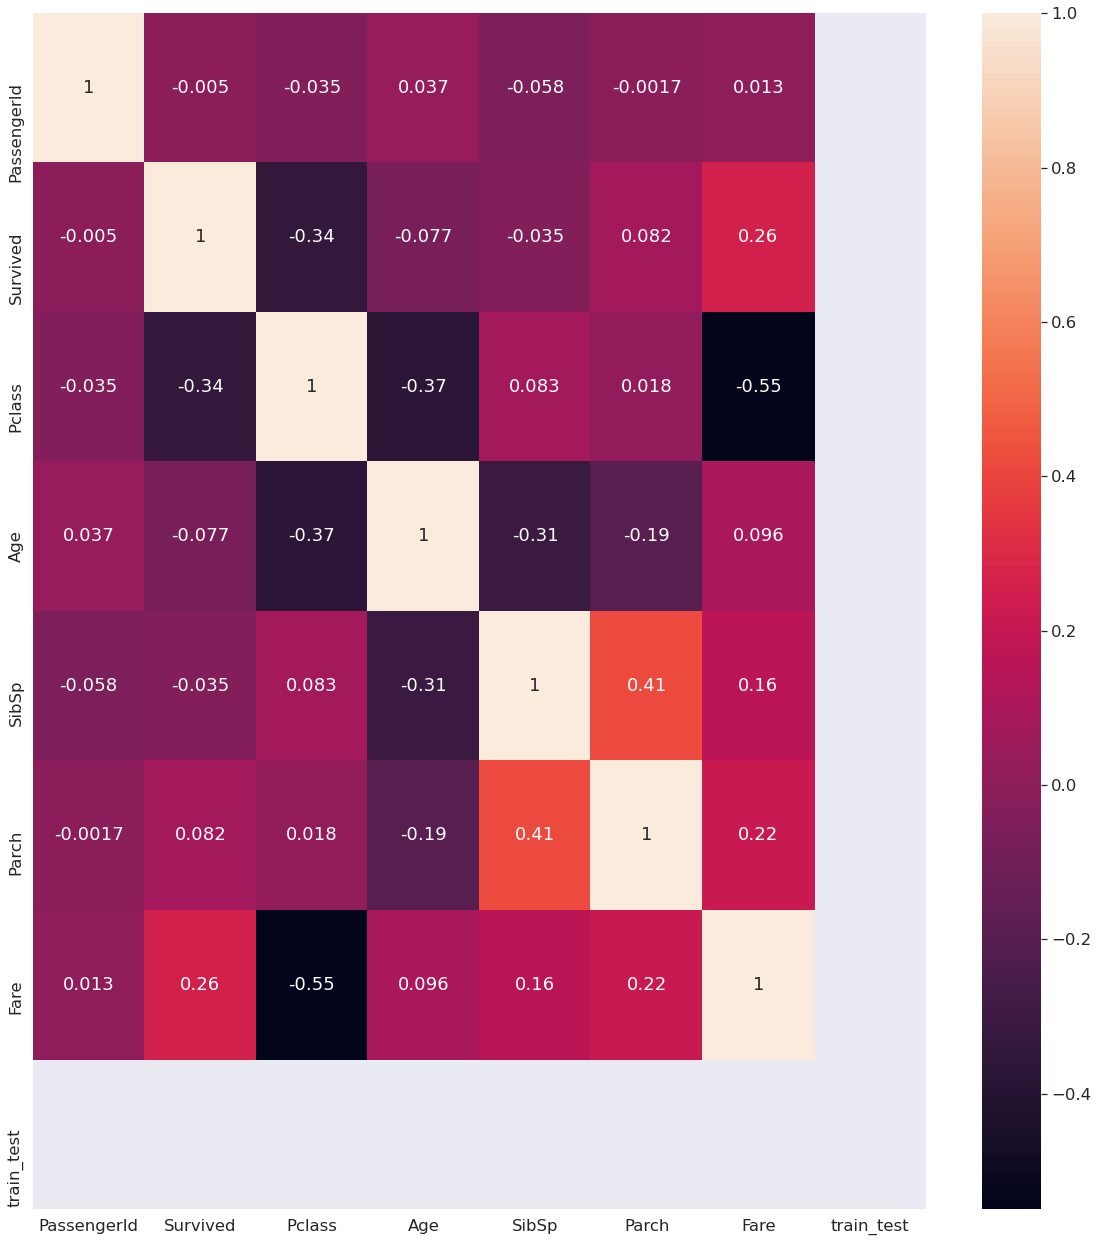

In [174]:
plt.figure(figsize= (20,22))
sns.set(font_scale=1.5)
sns.heatmap(corr, annot=True)
plt.show()

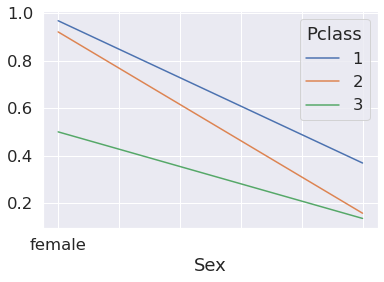

In [175]:
#lets look at survival rate by sex and class visually 
training.pivot_table('Survived',index='Sex',columns='Pclass').plot()

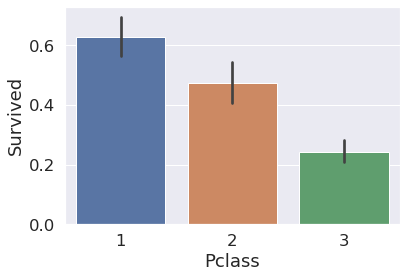

In [176]:
#now plot the survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=training )

# It generates a barplot of survival rate of pclass .from where we can see that 1st class survival rate is very high.so, first class has survival rate of above 60 percent and third class has survival rate of below 30 percent

In [177]:

age=pd.cut(training['Age'],[0,18,80])
training.pivot_table( 'Survived',['Sex',age],'Pclass')


Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# As we can see from the correlations, between 18 and 89 first class women has more survival rate.and age of fisrt class male between 0 to 18 has more survival rate .

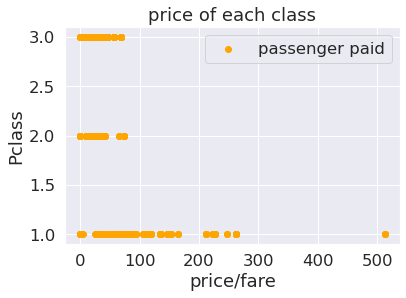

In [178]:
#plot the prices paid of each class 
plt.scatter(training['Fare'], training['Pclass'],color='orange',label='passenger paid')
plt.ylabel('Pclass')
plt.xlabel('price/fare')
plt.title('price of each class')
plt.legend()
plt.show()

# orange color dots represents price of each class . where 1st class price is high . so its acts like corresponding changes in those two features.

In [179]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

# age column is missing 177 values, embarked is missing 2 , cabin is missing 687 and train_test missing 2 values . isna() function calculates the sum of null values of each features.

In [180]:
for val in training:
  print(training[val].value_counts())
  print()


891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Ringhini, Mr. Sante                         1
Bateman, Rev. Robert James                  1
Petroff, Mr. Pastcho ("Pentcho")            1
Moussa, Mrs. (Mantoura Boulos)              1
Sivic, Mr. Husein                           1
                                           ..
Sundman, Mr. Johan Julian                   1
Cavendish, Mr. Tyrell William               1
Taussig, Mrs. Emil (Tillie Mandelbaum)      1
Harper, Mrs. Henry Sleeper (Myna Haxtun)    1
Stoytcheff, Mr. Ilia                        1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88,

# This fuction used here to see if one features has exactly same tuples or not .if  similiar features occur then we need to drop one feature as its a redundant value and there is no effect on the prediction performance rather it increases the computation time .

In [181]:
 corr_matrix = training.corr()
corr_matrix["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
train_test          NaN
Name: Survived, dtype: float64

In [182]:
#drop redundant columns
training = training.drop(['PassengerId', 'Name','Cabin','Ticket',], axis=1)
#remove the rows with missing values 
training = training.dropna( subset = ['Embarked']) 
median = training["Age"].median() 
training["Age"].fillna(median, inplace=True)

# By using `drop()` method I have dropped the column passengerid , name, cabin, ticket . where passengerid and name and ticket dont have any positive impact on prediction rather it lowers the accuracy percentage. Cabin contains a lot of null value. So, it's better to drop this column. using `dropna()` function we have droped the null rows of embarked , as it contains categorical value , we cant repplace the null value with median bvalue . in the age column we have replaced the null values with median value of age .thats how i have preprocessed my data . 

In [183]:

training.shape

(889, 9)

# After dropping 4 coloumns it becomes 9 column which was before 13. and dropping 2 rows it becomes 889 which was before 891.

In [184]:
training.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
train_test    0
dtype: int64

# Now there is no null value in those 9 columns.

In [185]:
training.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
train_test      int64
dtype: object

# we can  see that all columns have number values except embarkedand sex column. lets convert it to no values

In [186]:
#print the unique values in the columns

print(training['Embarked'].unique())

print(training['Sex'].unique())


['S' 'C' 'Q']
['male' 'female']


In [187]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#encode the embarked column
training.iloc[:, 7] = labelencoder.fit_transform( training.iloc[:, 7].values )
#encode the sex column
training.iloc[:, 2] = labelencoder.fit_transform( training.iloc[:, 2].values )




In [188]:
print(training['Embarked'].unique())
print(training['Sex'].unique())

[2 0 1]
[1 0]


# Converted into numerical value . embarked has [2,0,1], means it had 3 different type of categirical value , which converted to [0,1,2]. sex column had female and male , which converted to [1,0]

In [189]:
training.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
train_test      int64
dtype: object

# STEP 5: Select your classification model (try at least three model to find best one)

**selected 7 classificationmodel** 

In [190]:
#split the data into independent 'X' and dependent 'Y' variables
X=training.iloc[:,1:8].values #here 1:8 means column 2 to column 9
Y=training.iloc[:,0].values # here 0 means the index of survived which we want to predict

# Survived column is the dependent or label of the dataset , rest of the colums are features which is independent variable . based on those features we will predict survived or not 

In [191]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# STEP 6 :Perform cross validation of training data in all cases and run test data to
# decide which model is best. Here i have shown all classification with cross validation 

In [192]:


#logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
      
    
    
#KNeighbours
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

#svc (linear kernel)
from sklearn.svm import SVC

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
     

     
#gaussianNB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


#decision tree 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

#XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


[0.81818182 0.78169014 0.79577465 0.75352113 0.79577465]
0.78898847631242
[0.6993007  0.6971831  0.66197183 0.71830986 0.69014085]
0.6933812666207032
[0.69230769 0.64788732 0.67605634 0.65492958 0.68309859]
0.6708559046587217
[0.79020979 0.75352113 0.78873239 0.77464789 0.8028169 ]
0.781985620013789
[0.74125874 0.73239437 0.78873239 0.78873239 0.80985915]
0.7721954102235792
[0.82517483 0.78169014 0.79577465 0.78169014 0.8028169 ]
0.7974293312321482
[0.78321678 0.78873239 0.78169014 0.79577465 0.80985915]
0.7918546242489904


# as it is an classification problem . we have used 7 classification model and also perform cross validation in all models. from the cross validation score we can see that XGBClassifier performs best , the accuracy is 0.805.

In [193]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

# Voting classifier takes all of the inputs and averages the results, so that we can get to know the average result of all the models .

In [194]:
cv = cross_val_score(voting_clf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.83216783 0.78873239 0.8028169  0.80985915 0.8028169 ]
0.8072786368561017


# Average result = 0.81288%

# STEP 6:Try techniques like Grid Search etc. mentioned in the chapter 2 of textbook (TB2) to further fine tune your model. Examine whether fine tuning improve your prediction performance

In [195]:
#Grid search technique for fine tuning the model 
from sklearn.model_selection import GridSearchCV 

# gridsearch is used for fine tuning of model that used in the dataset . gridsearch model improves the prediction performance .

In [196]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [197]:
#gridsearch on logistic regression model

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s


Logistic Regression
Best Score: 0.7890081749236679
Best Parameters: {'C': 4.281332398719396, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


# performance did not improve . it remains same as before

In [198]:
#gridsearch on KneighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,Y_train)
clf_performance(best_clf_knn,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.7384516891559144
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.6s finished


# Previous score is 0.693 after performing gridsearch it becomes 0.738. The performance increased. 

In [ ]:
#gridsearch on SVC
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,Y_train)
clf_performance(best_clf_svc,'SVC')

# By using the Support Vector Machine, the score for the gridsearch gives us 0.80654987 percent score which was before 0.67123123 percent. 

In [ ]:
#gridsearch on randomforest classifier
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,Y_train)
clf_performance(best_clf_rf,'Random Forest')

 # Aforementioned, the score or the prediction was 0.79654654. It has increased to 0.823213654 now.

In [ ]:
# gridsearch on XGBClassifier
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [int],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,Y_train)
clf_performance(best_clf_xgb,'XGB')